In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ETH_HUNT_transactions.csv')

In [3]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])
df['date_only'] = df['block_timestamp'].dt.date
df

,block_timestamp,transaction_hash,trx_initiator,event_name,rate,buy/sell,huntprice,ethprice,Pool,ETH_in($),ETH_out($),HUNT_in($),HUNT_out($),date_only
0,2022-04-08 05:04:48,0x762ed0caa537b217b07c1787cdf37a93b45b9f7218a8...,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,Initialize,0.000280,Initialize,0.908356,3241.950377,HUNT / ETH,NaN,NaN,NaN,NaN,2022-04-08
1,2022-04-08 05:04:48,0x762ed0caa537b217b07c1787cdf37a93b45b9f7218a8...,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,Increase liquidity,0.000280,Increase liquidity,0.908356,3241.950377,HUNT / ETH,3.241950e+04,NaN,3.241950e+04,NaN,2022-04-08
2,2022-04-08 05:12:15,0x802d47d7ccafb34542686d1508d813840dc61f071429...,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,Increase liquidity,0.000280,Increase liquidity,0.908356,3241.950377,HUNT / ETH,1.361619e+06,NaN,1.361619e+06,NaN,2022-04-08
3,2022-04-08 09:53:01,0x3e4017527b47657983fb2f63fbb5c899314f816fe079...,0x85522b66ea1393bebfc13a566719bea857c36d63,Swap,0.000286,Buy,0.935226,3273.374056,HUNT / ETH,1.880456e+04,NaN,NaN,18748.147262,2022-04-08
4,2022-04-08 09:56:40,0xe3680ac0992420b54786318368fddc7d536c3da3e154...,0x839d4641f97153b0ff26ab837860c479e2bd0242,Swap,0.000288,Sell,0.943249,3273.374056,HUNT / ETH,NaN,5906.528827,5.924302e+03,NaN,2022-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,2023-02-04 00:42:23,0xa4fe72dad70fca70572b7f7d0c0f34cb04464e5e025c...,0xcfc387b2d9bb52200d942752f44a41d658ee82de,Swap,0.000213,Sell,0.350656,1650.081809,HUNT / ETH,NaN,6989.904979,7.010938e+03,NaN,2023-02-04
3689,2023-02-04 02:05:23,0x8affa4cc6aac91e77d6c1a9549f53796c19dff26cdb3...,0x55dcad916750c19c4ec69d65ff0317767b36ce90,Swap,0.000212,Buy,0.349147,1650.081809,HUNT / ETH,3.300164e+03,NaN,NaN,3290.263127,2023-02-04
3690,2023-02-04 02:07:11,0xe8d2b436b713cc97d84674a9e0be5cad0ec84cc2e609...,0x55dcad916750c19c4ec69d65ff0317767b36ce90,Swap,0.000214,Buy,0.352514,1650.081809,HUNT / ETH,4.950245e+03,NaN,NaN,4935.394691,2023-02-04
3691,2023-02-04 03:18:23,0x6ed36f99627deef6208cbb16bac1caae29676b703bb5...,0xe2e54270813c5c44a6f97d123120952a12b00000,Swap,0.000216,Buy,0.356582,1650.081809,HUNT / ETH,4.958942e+03,NaN,NaN,4944.065487,2023-02-04


In [4]:
wa = df[['trx_initiator', 'date_only']]
wa

,trx_initiator,date_only
0,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,2022-04-08
1,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,2022-04-08
2,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,2022-04-08
3,0x85522b66ea1393bebfc13a566719bea857c36d63,2022-04-08
4,0x839d4641f97153b0ff26ab837860c479e2bd0242,2022-04-08
...,...,...
3688,0xcfc387b2d9bb52200d942752f44a41d658ee82de,2023-02-04
3689,0x55dcad916750c19c4ec69d65ff0317767b36ce90,2023-02-04
3690,0x55dcad916750c19c4ec69d65ff0317767b36ce90,2023-02-04
3691,0xe2e54270813c5c44a6f97d123120952a12b00000,2023-02-04


In [5]:
wa.drop_duplicates(subset=['date_only', 'trx_initiator'], keep='first', inplace=True)
wa

,trx_initiator,date_only
0,0xe1aaf39db1cd7e16c4305410fe72b13c7add17e6,2022-04-08
3,0x85522b66ea1393bebfc13a566719bea857c36d63,2022-04-08
4,0x839d4641f97153b0ff26ab837860c479e2bd0242,2022-04-08
5,0xd8ffd4d86263b5c21af99dd1743c3ab8246d7fa0,2022-04-08
8,0x74067744295a1b9d440e900e1af660c90150d510,2022-04-10
...,...,...
3681,0x55dcad916750c19c4ec69d65ff0317767b36ce90,2023-02-04
3682,0x1872c1bbb51c9d1129420f8baa4e6b7ddef79dfb,2023-02-04
3683,0x9073c8c1fee3dd73fb10c0b4241ce8b708a7c432,2023-02-04
3691,0xe2e54270813c5c44a6f97d123120952a12b00000,2023-02-04


In [6]:
wa = wa.groupby('date_only').trx_initiator.count().reset_index()
wa

,date_only,trx_initiator
0,2022-04-08,4
1,2022-04-10,2
2,2022-04-11,3
3,2022-04-12,2
4,2022-04-13,4
...,...,...
290,2023-01-31,3
291,2023-02-01,5
292,2023-02-02,9
293,2023-02-03,3


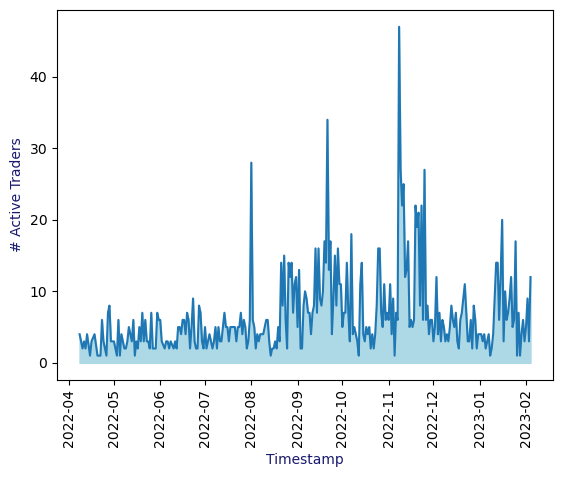

In [7]:
x = wa['date_only']
y = wa['trx_initiator']

plt.fill_between(x, y, color='lightblue')
plt.plot(x, y)
plt.xlabel('Timestamp', color = 'midnightblue')
plt.ylabel('# Active Traders', color = 'midnightblue')
plt.xticks(rotation=90)
plt.show()